In [1]:
import pandas as pd

In [29]:
data = pd.read_csv('../Jobsnew.csv',delimiter='\t',encoding='latin-1')

data = data.abstract.tolist()

In [42]:
import nltk
import itertools

'''
Is wordbag useful for training or frequency plot
'''

words = [str(a).split() for a in [a for a in data]]
word_bag = (list(itertools.chain(*words)))

In [84]:
test = ' '.join(words[0]) 

test

'We are looking for suitable applicants to fill the positions of Delicatessen Assistant Manager and Delicatessen Supervisor at our Edmonton store. The applicants must have at least 1 year management/supervisory experience in a large Delicatessen Department including strong team leadership qualities.'

In [71]:
import string



transtable = {ord(s):None for s in string.punctuation}
transtable[ord('/')] = u' '
test = test.translate(transtable)
test

'We are looking for suitable applicants to fill the positions of Delicatessen Assistant Manager and Delicatessen Supervisor at our Edmonton store The applicants must have at least 1 year management supervisory experience in a large Delicatessen Department including strong team leadership qualities'

In [80]:
numbered_abstracts = {n:nltk.word_tokenize(str(w)) for n,w in enumerate(data)}

In [81]:
numbered_abstracts

{0: ['We',
  'are',
  'looking',
  'for',
  'suitable',
  'applicants',
  'to',
  'fill',
  'the',
  'positions',
  'of',
  'Delicatessen',
  'Assistant',
  'Manager',
  'and',
  'Delicatessen',
  'Supervisor',
  'at',
  'our',
  'Edmonton',
  'store',
  '.',
  'The',
  'applicants',
  'must',
  'have',
  'at',
  'least',
  '1',
  'year',
  'management/supervisory',
  'experience',
  'in',
  'a',
  'large',
  'Delicatessen',
  'Department',
  'including',
  'strong',
  'team',
  'leadership',
  'qualities',
  '.'],
 1: ['Brickies',
  'Labourer',
  'required',
  'for',
  'a',
  'small',
  'team',
  'working',
  'with',
  'the',
  'owner',
  '.',
  'A',
  'good',
  'environment',
  'where',
  'we',
  'are',
  'happy',
  'to',
  'guide',
  'and',
  'teach',
  'our',
  'labourers',
  '.',
  'All',
  'our',
  'Bricklayers',
  'have',
  'first',
  'been',
  'labourers',
  'and',
  'treat',
  'them',
  'well',
  '.',
  'Must',
  'have',
  'a',
  'white',
  'card',
  ',',
  'ABN',
  ',',
  'wo

In [8]:
text = data[1:10]

In [9]:
import nltk

tokenization_pattern = r'''(?x) # set flag to allow verbose regexps 
([A-Z]\.)+ # abbreviations, e.g. U.S.A.
| \w+(-\w+)* # words with optional internal hyphens 
|\$?\d+(\.\d+)?%? #currencyandpercentages,e.g.$12.40,82% 
|\w+[\x90-\xff] #theseareescapedemojis
|[][.,;"'?():-_`] #theseareseparatetokens '''        

word_tokenizer = nltk.tokenize.regexp.RegexpTokenizer(tokenization_pattern)

In [4]:
word_tokenizer

RegexpTokenizer(pattern='(?x) # set flag to allow verbose regexps \n([A-Z]\\.)+ # abbreviations, e.g. U.S.A.\n| \\w+(-\\w+)* # words with optional internal hyphens \n|\\$?\\d+(\\.\\d+)?%? #currencyandpercentages,e.g.$12.40,82% \n|\\w+[\\x90-\\xff] #theseareescapedemojis\n|[][.,;"\'?():-_`] #theseareseparatetokens ', gaps=False, discard_empty=True, flags=56)

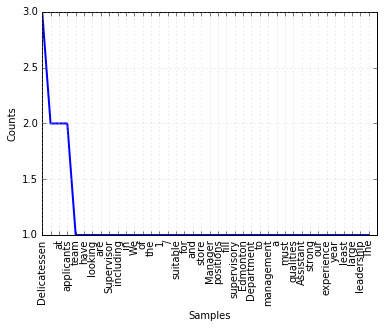

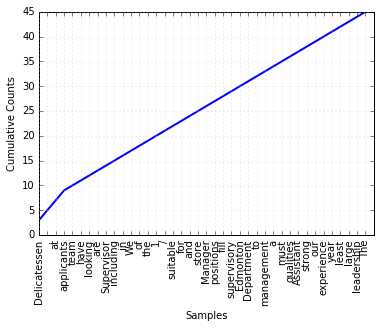

[('Delicatessen', 3),
 ('.', 2),
 ('at', 2),
 ('applicants', 2),
 ('team', 1),
 ('have', 1),
 ('looking', 1),
 ('are', 1),
 ('Supervisor', 1),
 ('including', 1),
 ('in', 1),
 ('We', 1)]

In [17]:
'''
Remove punctuation and stopwords first
'''

%matplotlib inline
fd = nltk.FreqDist(nltk.wordpunct_tokenize(data[0])) 
fd.plot()
fd.plot(50, cumulative=True) 
fd.most_common(12)

In [13]:
'''
How do I provide all the text to the BigramCollocationFinder?
'''

bigram_measures = nltk.collocations.BigramAssocMeasures() 
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = nltk.collocations.BigramCollocationFinder.from_words(nltk.wordpunct_tokenize(text[0])) 
finder.nbest(bigram_measures.pmi, 10)

[('A', 'good'),
 ('Brickies', 'Labourer'),
 ('Labourer', 'required'),
 ('Megan', 'on'),
 ('To', 'discuss'),
 ('are', 'happy'),
 ('environment', 'where'),
 ('first', 'been'),
 ('good', 'environment'),
 ('position', 'call')]

In [15]:
'''
Same here, more text needed, does the text need to have puncn removed and stopwords removed?'''

finder = nltk.collocations.TrigramCollocationFinder.from_words(nltk.wordpunct_tokenize(text[0]))
finder.nbest(trigram_measures.pmi, 10)

[('A', 'good', 'environment'),
 ('Brickies', 'Labourer', 'required'),
 ('Labourer', 'required', 'for'),
 ('environment', 'where', 'we'),
 ('good', 'environment', 'where'),
 ('small', 'team', 'working'),
 ('team', 'working', 'with'),
 ('text', 'Megan', 'on'),
 ('treat', 'them', 'well'),
 ('we', 'are', 'happy')]

In [11]:
text

['Brickies Labourer required for a small team working with the owner. A good environment where we are happy to guide and teach our labourers. All our Bricklayers have first been labourers and treat them well. Must have a white card, ABN, work boots and some experience. To discuss the position call or text Megan on *******6344 + click to reveal or Mark *******6344 + click to reveal',
 'We are looking for someone to take up to the next level and who has previously worked as a Head Chef in a pub environment,. You will have a strong passion for producing amazing pub grub with presentation to match.',
 'We are seeking experienced conveyancing /settlement clerks who are keen to take on a new challenge in their career! Stepping away from file management completely, you will have the opportunity to use your people skills to hit the road and build relationships with a number of other professionals in the industry!',
 'This is fundamentally a nuts and bolts role that would suit a systematically 